<a href="https://colab.research.google.com/github/Yamito548/Act-3.2/blob/main/3_2_Dylan_(pinguin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultinomialNB

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
penguin = sns.load_dataset("penguins")
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
print("Valores nulos antes del preprocesamiento:\n", penguin.isnull().sum())

Valores nulos antes del preprocesamiento:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [5]:
penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin.mean())

<ipython-input-5-121cb5fe3b6a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin.mean())


In [6]:
penguin['sex'] = penguin['sex'].fillna(penguin['sex'].mode().iloc[0])

In [7]:
print("Valores nulos después del preprocesamiento:\n", penguin.isnull().sum())


Valores nulos después del preprocesamiento:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [8]:
penguin['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
# # separamos datos de entrada y salida
X_penguin = penguin.drop('species', axis=1)
y_penguin = penguin['species']

In [10]:
# #Eliminar las filas con NaN en la columna species
# penguin = penguin.dropna()

In [11]:
#Pasamos las especies a numeros
X_penguin = pd.get_dummies(X_penguin, drop_first=True)
# separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguin, y_penguin, test_size=0.33, random_state=1)

In [12]:
# # 1. elegimos clasificador
from sklearn.naive_bayes import MultinomialNB
# 2. instanciamos el modelo
model = MultinomialNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

MultinomialNB()

In [13]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Adeli

In [14]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # Precisión del modelo

0.8508771929824561

In [15]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [16]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
ytest_df

,species
306,2
341,2
291,2
102,0
289,2
...,...
17,0
257,2
224,2
88,0


In [17]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 1, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 0, 0])

Confusion matrix, without normalization
[[43  3  4]
 [ 8 15  0]
 [ 2  0 39]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

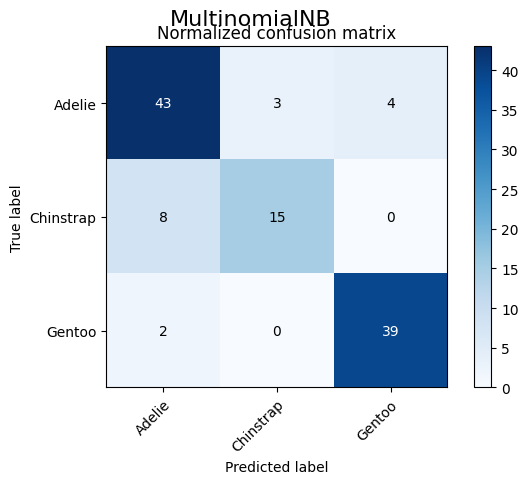

In [18]:
# Creamos este array porque es el parámetro con las clases que espera la función
clases_pin = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_pin, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')

# BernoulliNB

In [19]:
penguin2 = sns.load_dataset("penguins")
penguin2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
#Cambiamos valores NaN por valores reales.
penguin2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    penguin2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin2.mean())

<ipython-input-20-f00a501757b2>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin2[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin2.mean())


In [21]:
#Hacemos lo mismo para el sexo, cogiendo el sexo que más se repite
penguin['sex'] = penguin['sex'].fillna(penguin['sex'].mode().iloc[0])

In [22]:
#Vemos todas las espicies del dataset.
penguin['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [23]:
# # separamos datos de entrada y salida
X2_penguin = penguin2.drop('species', axis=1)
y2_penguin = penguin2['species']

In [24]:
#Pasamos las especies a numeros
X2_penguin = pd.get_dummies(X2_penguin, drop_first=True)
# separamos train y test
X2train, X2test, y2train, y2test = train_test_split(X2_penguin, y2_penguin, test_size=0.33, random_state=1)

In [25]:
# # 1. elegimos clasificador
from sklearn.naive_bayes import BernoulliNB
# 2. instanciamos el modelo
model2 = BernoulliNB()
# 3. Entrenamiento con los datos
model2.fit(X2train, y2train)

BernoulliNB()

In [26]:
# 4. Predicción con nuevos datos
y2_model = model2.predict(X2test)
y2_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 

In [27]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y2test, y2_model) # Precisión del modelo

0.7543859649122807

In [28]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y2test_df= y2test.to_frame()
y2test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y2test_df

,species
306,2
341,2
291,2
102,0
289,2
...,...
17,0
257,2
224,2
88,0


In [29]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y2_model_df= pd.DataFrame(y2_model, columns = ['species'])
y2_model_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y2_model_array = y2_model_df['species'].to_numpy()
y2_model_array

array([2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       2, 2, 1, 1])

Confusion matrix, without normalization
[[22 14 14]
 [ 0 23  0]
 [ 0  0 41]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

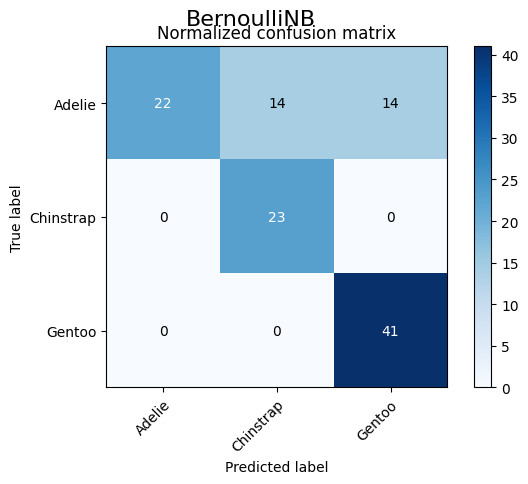

In [30]:
# Creamos este array porque es el parámetro con las clases que espera la función
clases_pin = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
plot_confusion_matrix(y2test_df['species'], y2_model_array, classes=clases_pin, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB')

# ComplementNB

In [31]:
penguin3 = sns.load_dataset("penguins")
penguin3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [32]:
#Cambiamos valores NaN por valores reales.
penguin3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    penguin3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin3.mean())

<ipython-input-32-b8ee38b8f6c3>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin3.mean())


In [33]:
#Hacemos lo mismo para el sexo, cogiendo el sexo que más se repite
penguin['sex'] = penguin['sex'].fillna(penguin['sex'].mode().iloc[0])

In [34]:
# # separamos datos de entrada y salida
X3_penguin = penguin3.drop('species', axis=1)
y3_penguin = penguin3['species']

In [35]:
#Pasamos las especies a numeros
X3_penguin = pd.get_dummies(X3_penguin, drop_first=True)
# separamos train y test
X3train, X3test, y3train, y3test = train_test_split(X3_penguin, y3_penguin, test_size=0.33, random_state=1)

In [36]:
# # 1. elegimos clasificador
from sklearn.naive_bayes import ComplementNB
# 2. instanciamos el modelo
model3 = ComplementNB()
# 3. Entrenamiento con los datos
model3.fit(X3train, y3train)

ComplementNB()

In [37]:
# 4. Predicción con nuevos datos
y3_model = model3.predict(X2test)
y3_model

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Ade

In [38]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
accuracy_score(y3test, y3_model) # Precisión del modelo

0.7982456140350878

In [39]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
y3test_df= y3test.to_frame()
y3test_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
y3test_df

,species
306,2
341,2
291,2
102,0
289,2
...,...
17,0
257,2
224,2
88,0


In [40]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y3_model_df= pd.DataFrame(y3_model, columns = ['species'])
y3_model_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y3_model_array = y3_model_df['species'].to_numpy()
y3_model_array

array([2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 1])

Confusion matrix, without normalization
[[40  0 10]
 [ 9 10  4]
 [ 0  0 41]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

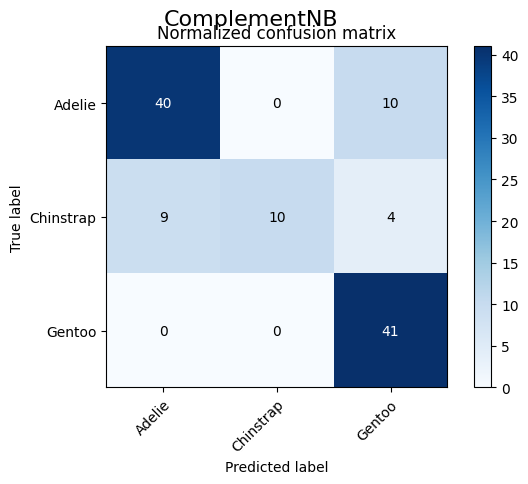

In [41]:
# Creamos este array porque es el parámetro con las clases que espera la función
clases_pin = np.array(['Adelie', 'Chinstrap', 'Gentoo'])
plot_confusion_matrix(y3test_df['species'], y3_model_array, classes=clases_pin, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')

# CategoricalNB

In [42]:
penguin4 = sns.load_dataset("penguins")
penguin4

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [43]:
#Cambiamos valores NaN por valores reales.
penguin4[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    penguin4[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin4.mean())

<ipython-input-43-cb1c76c3d789>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin4[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin4.mean())


In [44]:
#Hacemos lo mismo para el sexo, cogiendo el sexo que más se repite
penguin4['sex'] = penguin4['sex'].fillna(penguin4['sex'].mode().iloc[0])

In [45]:
#Vemos todas las espicies del dataset.
penguin4['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [46]:
# # separamos datos de entrada y salida
X4_penguin = penguin4.drop('species', axis=1)
y4_penguin = penguin4['species']

In [47]:
#Pasamos las especies a numeros
X4_penguin = pd.get_dummies(X4_penguin, drop_first=True)
# separamos train y test
X4train, X4test, y4train, y4test = train_test_split(X4_penguin, y4_penguin, test_size=0.33, random_state=1)

In [48]:
# # 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB
# 2. instanciamos el modelo
model4 = CategoricalNB()
# 3. Entrenamiento con los datos
model4.fit(X4train, y4train)

CategoricalNB()

In [49]:
# 4. Predicción con nuevos datos
y4_model = model4.predict(X4test)
y4_model

IndexError: ignored